In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy.fft as fft
import numpy as np

%matplotlib inline

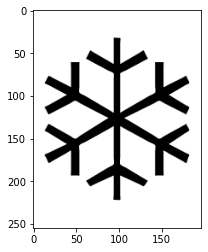

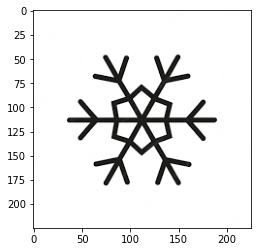

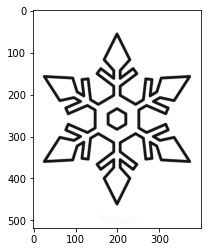

In [30]:
# Load Images
import glob
image_ls =[]
for image_path in glob.glob("images/*"):
    plt.figure()
    im = Image.open(image_path)
    plt.imshow(im)
    image_ls.append(im)

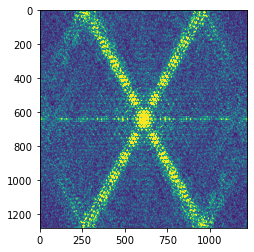

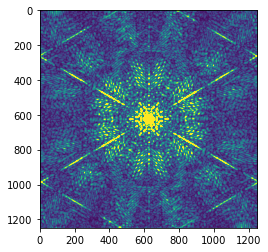

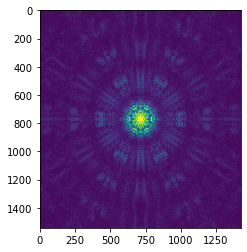

In [76]:
# FFT
f_im_ls = []
for im in image_ls:
    pad_im = np.pad(im, (512,512), 'constant', constant_values=0)
    f_im =np.fft.fftshift( np.fft.fft2(pad_im))
    plt.figure()
    plt.imshow(np.abs(f_im) )
    max_pix= np.max(np.max(np.abs(f_im)))
    min_pix = np.min(np.min(np.abs(f_im)))
    plt.clim(min_pix, max_pix/20)
    f_im_ls.append(f_im)
    

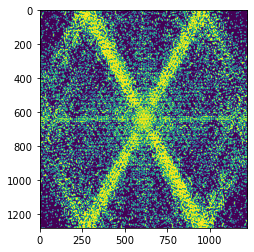

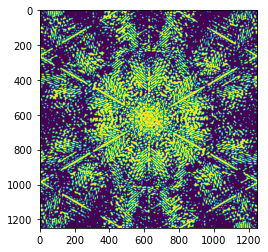

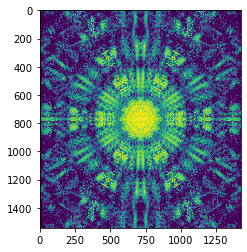

In [77]:
# make masks

for f_im in f_im_ls:
    im_abs = np.abs(f_im)
    mean_pix_val = np.mean(np.mean(im_abs))
    ind = im_abs >= mean_pix_val
    ind1 = im_abs < mean_pix_val
    im_abs[ind]= 1
    im_abs[ind1]= 0
    plt.figure()
    plt.imshow(im_abs)


(array([143770.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  63430.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

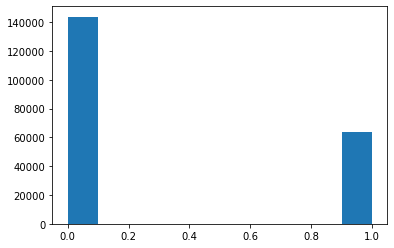

In [63]:
plt.hist(np.reshape(im_abs, (np.shape(im_abs)[0]*np.shape(im_abs)[1],)))